In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline  

In [3]:
df=pd.read_csv("sexoffenders.csv",dtype={'AgeGroup': str},encoding = "cp1252")

df['AgeGroup']=df.AgeGroup.replace('65 years and over','65+')
df['AgeGroup']=df.AgeGroup.replace('Oct-14','0-14')
df

,gender,AgeGroup,y_2012,y_2013,y_2014,y_2015,y_2016
0,M,0-14,120.0,125.0,133.0,117.0,149.0
1,M,15-19,346.0,367.0,423.0,349.0,447.0
2,M,20-24,303.0,308.0,362.0,367.0,426.0
3,M,25-29,271.0,304.0,302.0,324.0,351.0
4,M,30-34,248.0,251.0,276.0,320.0,365.0
5,M,35-39,247.0,247.0,291.0,263.0,326.0
6,M,40-44,258.0,278.0,262.0,274.0,302.0
7,M,45-49,209.0,231.0,233.0,217.0,279.0
8,M,50-54,194.0,181.0,181.0,184.0,218.0
9,M,55-59,138.0,155.0,167.0,149.0,185.0


In [4]:
df.columns=df.columns.str.replace('y_','')

#df.fillna(0)
df=df.dropna(axis=0)  #Delete rows with NaN values
df

,gender,AgeGroup,2012,2013,2014,2015,2016
0,M,0-14,120.0,125.0,133.0,117.0,149.0
1,M,15-19,346.0,367.0,423.0,349.0,447.0
2,M,20-24,303.0,308.0,362.0,367.0,426.0
3,M,25-29,271.0,304.0,302.0,324.0,351.0
4,M,30-34,248.0,251.0,276.0,320.0,365.0
5,M,35-39,247.0,247.0,291.0,263.0,326.0
6,M,40-44,258.0,278.0,262.0,274.0,302.0
7,M,45-49,209.0,231.0,233.0,217.0,279.0
8,M,50-54,194.0,181.0,181.0,184.0,218.0
9,M,55-59,138.0,155.0,167.0,149.0,185.0


In [5]:
df=df.reset_index(drop=True) #Reset index after deleting rows
df

,gender,AgeGroup,2012,2013,2014,2015,2016
0,M,0-14,120.0,125.0,133.0,117.0,149.0
1,M,15-19,346.0,367.0,423.0,349.0,447.0
2,M,20-24,303.0,308.0,362.0,367.0,426.0
3,M,25-29,271.0,304.0,302.0,324.0,351.0
4,M,30-34,248.0,251.0,276.0,320.0,365.0
5,M,35-39,247.0,247.0,291.0,263.0,326.0
6,M,40-44,258.0,278.0,262.0,274.0,302.0
7,M,45-49,209.0,231.0,233.0,217.0,279.0
8,M,50-54,194.0,181.0,181.0,184.0,218.0
9,M,55-59,138.0,155.0,167.0,149.0,185.0


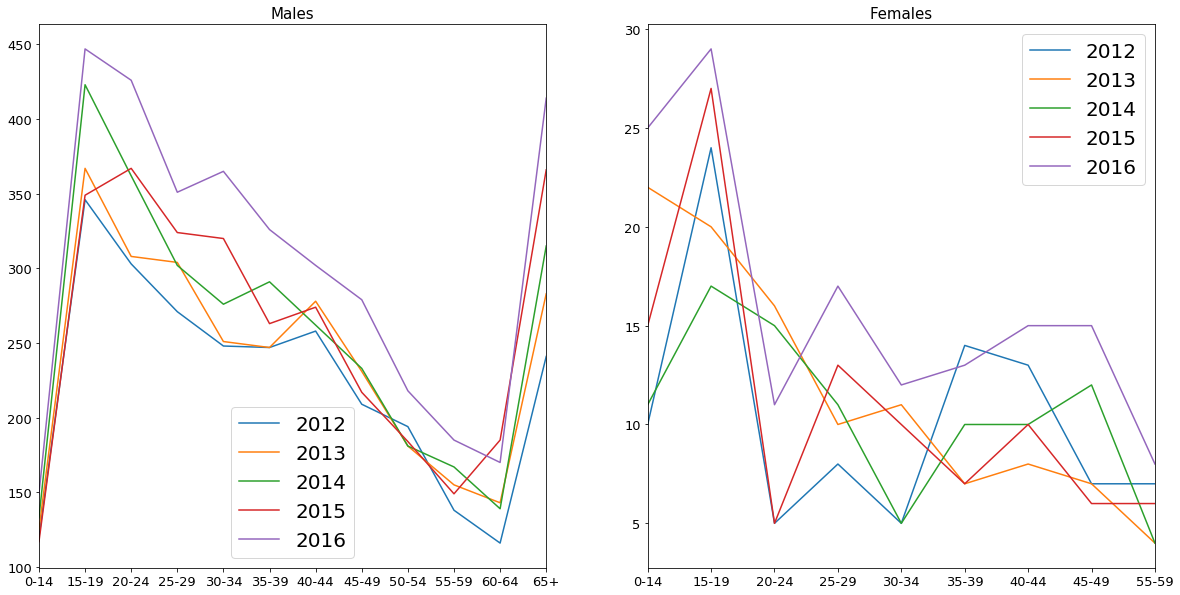

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2) # if we add ,sharey=True it will plot to equal Y axes
plt.rcParams['legend.fontsize']=20
plt.rcParams['axes.titlesize']=15
plt.rcParams['axes.labelsize']=20



df[df.gender=='M'].plot(title='Males',ax=ax[0],figsize=(20,10),fontsize=13)
#ax=df[df.gender=='M'].set_index('AgeGroup').plot(figsize=(20,10),sharex=False,fontsize=20) , did this earlier\
#which sets the index to AgeGroup automatically, which works because AgeGroup is a string

#setting up the labels for the ticks
ax[0].set_xticks(df[df.gender=='M']['AgeGroup'].index) #setting x ticks with the list of ticks, no of ticks
ax[0].set_xticklabels(df[df.gender=='M']['AgeGroup'].values) #passing the xtick label

 
ax[1]=df[df.gender=='F'].plot(title='Females',ax=ax[1],figsize=(20,10),fontsize=13)
#ax=df[df.gender=='M'].set_index('AgeGroup').plot(figsize=(20,10),sharex=False,fontsize=20) , did this earlier\
#which sets the index to AgeGroup automatically, but hard to control the frequency of index

#setting up the labels for the ticks
ax[1].set_xticks(df[df.gender=='F']['AgeGroup'].index) #setting x ticks with the list of ticks, no of ticks
ax[1].set_xticklabels(df[df.gender=='F']['AgeGroup'].values) #passing the xtick label


In [7]:
df1=pd.read_csv("Crimebyagexgender.csv",dtype={'AgeGroups': str},encoding = "cp1252")
df1

,gender,AgeGroups,y_2012,y_2013,y_2014,y_2015,y_2016
0,M,10–14,2595.638902,2376.912011,2267.883174,2358.101608,2323.021828
1,M,15–19,11836.970260,11526.769310,11041.647460,10785.747560,11158.809960
2,M,20–24,10720.401060,10762.610250,10478.154220,9828.549377,11091.156770
3,M,25–29,7808.940970,8370.995734,8508.822491,8673.426816,9611.166840
4,M,30–34,7040.423626,7631.598858,7692.202099,8036.067073,8802.186815
5,M,35–39,6123.888520,6743.775529,6983.122040,7453.981138,8315.769764
6,M,40–44,4733.370609,5391.957808,5393.504702,5895.973039,6786.424199
7,M,45–49,2964.093415,3541.529766,3842.254291,3904.608921,4602.340341
8,M,50–54,1824.232241,2056.119069,2167.928793,2372.560086,2733.040508
9,M,55–59,1189.340573,1257.329928,1271.719601,1373.085906,1350.486647


In [8]:
df1['AgeGroups']=df1.AgeGroups.replace('65 years and over','65+')
df1.columns=df1.columns.str.replace('y_','')
df1

,gender,AgeGroups,2012,2013,2014,2015,2016
0,M,10–14,2595.638902,2376.912011,2267.883174,2358.101608,2323.021828
1,M,15–19,11836.970260,11526.769310,11041.647460,10785.747560,11158.809960
2,M,20–24,10720.401060,10762.610250,10478.154220,9828.549377,11091.156770
3,M,25–29,7808.940970,8370.995734,8508.822491,8673.426816,9611.166840
4,M,30–34,7040.423626,7631.598858,7692.202099,8036.067073,8802.186815
5,M,35–39,6123.888520,6743.775529,6983.122040,7453.981138,8315.769764
6,M,40–44,4733.370609,5391.957808,5393.504702,5895.973039,6786.424199
7,M,45–49,2964.093415,3541.529766,3842.254291,3904.608921,4602.340341
8,M,50–54,1824.232241,2056.119069,2167.928793,2372.560086,2733.040508
9,M,55–59,1189.340573,1257.329928,1271.719601,1373.085906,1350.486647


In [9]:
males_crime=df1[df1.gender=='M'].sum(axis=0,numeric_only='int')
male_mean=males_crime.mean(axis=0)
male_mean

61934.606266759991

In [10]:
females_crime=df1[df1.gender=='F'].sum(axis=0,numeric_only='int')
female_mean=females_crime.mean(axis=0)
female_mean

15035.712586958001

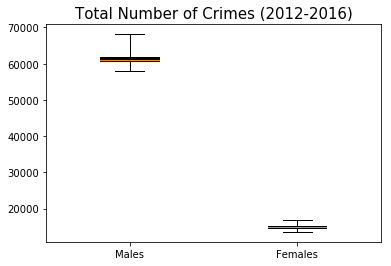

In [11]:
fig1, ax = plt.subplots(nrows=1, ncols=1) # if we add ,sharey=True it will plot to equal Y axes
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

gender=['Males','Females']
std=males_crime.std()
data=[males_crime,females_crime]

bp=plt.boxplot(data,whis=30,widths=(0.35, 0.35),labels=gender,patch_artist=True)
plt.setp(bp['boxes'],color='black')
ax.set_title('Total Number of Crimes (2012-2016)')


(-1.1018505978262971,
 1.1000881237060141,
 -1.102690240547785,
 1.1010951196593772)

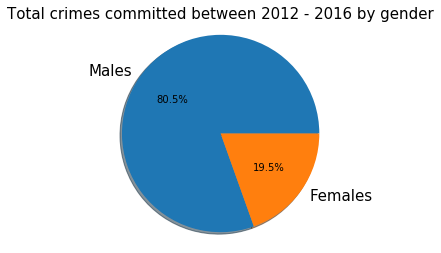

In [12]:
total=[male_mean,female_mean]
plt.pie(total,autopct='%1.1f%%', labels=gender,shadow=True)
plt.title('Total crimes committed between 2012 - 2016 by gender')
plt.axis('equal')

In [13]:
df2=pd.read_csv("CrimebyCategoryxgender.csv",dtype={'AgeGroups': str},encoding = "cp1252")
df2
df2[df2.isnull().any(axis=1)]
df2=df2.dropna(axis=0)
df2.columns=df2.columns.str.replace('y_','')
df2

,cat,gender,2012,2013,2014,2015,2016
0,A10,M,158.0,117,138.0,167.0,148.0
1,A20,M,19060.0,21646,21954.0,22469.0,25075.0
2,A30,M,2714.0,2899,3117.0,3148.0,3675.0
3,A40,M,238.0,219,242.0,250.0,293.0
4,A50,M,2030.0,1804,1472.0,1682.0,2068.0
5,A60,M,51.0,67,58.0,66.0,54.0
6,A70,M,3438.0,4130,4275.0,4513.0,4962.0
7,A80,M,1762.0,1838,1985.0,2050.0,2514.0
8,B10,M,726.0,925,937.0,888.0,1170.0
9,B20,M,7566.0,7912,7615.0,7957.0,9040.0


In [14]:
crime_categ={'A':'Crimes against person','B':'Property and deception offences','C':'Drug Offences','D':'Public order and security offences', 'F': 'Other offences'}

df2[(df2['gender']=='M')&(df2['cat'].str.contains('A'))]

,cat,gender,2012,2013,2014,2015,2016
0,A10,M,158.0,117,138.0,167.0,148.0
1,A20,M,19060.0,21646,21954.0,22469.0,25075.0
2,A30,M,2714.0,2899,3117.0,3148.0,3675.0
3,A40,M,238.0,219,242.0,250.0,293.0
4,A50,M,2030.0,1804,1472.0,1682.0,2068.0
5,A60,M,51.0,67,58.0,66.0,54.0
6,A70,M,3438.0,4130,4275.0,4513.0,4962.0
7,A80,M,1762.0,1838,1985.0,2050.0,2514.0


In [15]:
crime_categ.values()

dict_values(['Crimes against person', 'Property and deception offences', 'Public order and security offences', 'Drug Offences', 'Other offences'])

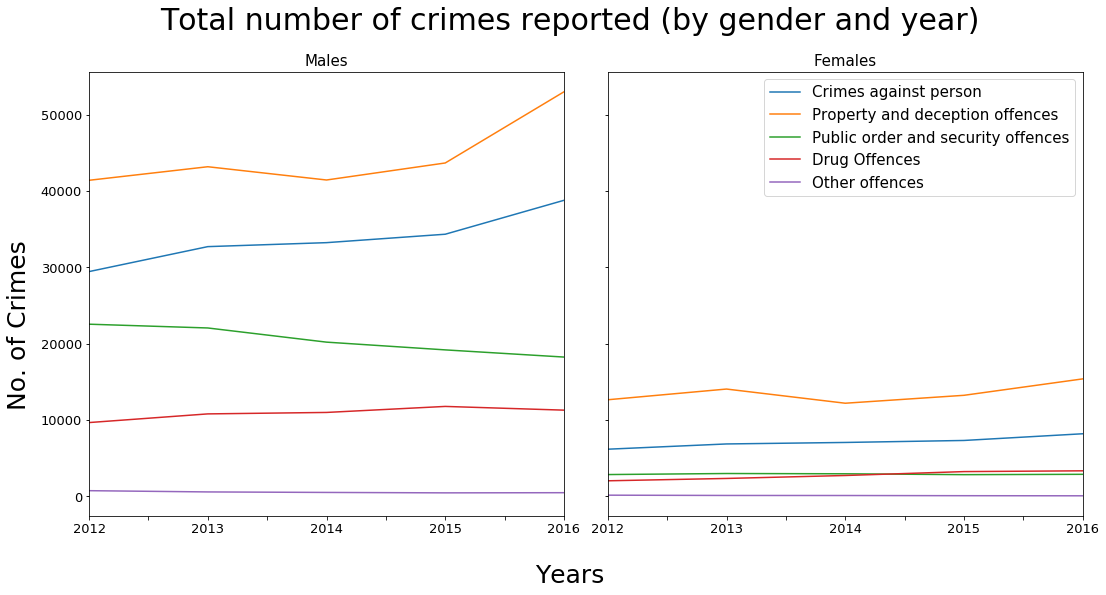

In [16]:
#males_all_categ=
fig, ax = plt.subplots(nrows=1, ncols=2,sharey=True) # if we add ,sharey=True it will plot to equal Y axes
#fig.subplots_adjust(top=0.85)
plt.rcParams['legend.fontsize']=15
#plt.rcParams['axes.titlesize']=25
#plt.rcParams['axes.labelsize']=25
ct=0 #counter for axis
gender1=['M','F']
gender2=['Males','Females']
for j in gender1:
    for i in crime_categ.keys():
        #print(i)
        sum_gender=df2[(df2['gender']==j)&(df2['cat'].str.contains(i))].sum(axis=0,numeric_only='int')
        sum_gender.plot(title=gender2[ct],ax=ax[ct],figsize=(15,10),fontsize=13)
    ct+=1
    ax[1].legend(crime_categ.values(), loc=1, bbox_to_anchor=(1, 1))
fig.text(0.5, 0.2,'Years',ha='center',fontsize=25)
fig.text(-0.01, 0.65,'No. of Crimes',ha='center',rotation='vertical',fontsize=25)
fig.tight_layout(rect=[0,0.25,1,0.95])
fig.suptitle('Total number of crimes reported (by gender and year)',x=0.5,y=1,fontsize=30)


# Mapping the Crime numbers to each State in Victoria

In [53]:
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
from matplotlib import colors
from matplotlib import cm


df_post=pd.read_csv("CrimebyPostcode.csv",encoding = "cp1252")
df_post.head()

,Postcode,y_2012,y_2013,y_2014,y_2015,y_2016
0,3000,25046,22604,21816,22158,23715
1,3002,788,1044,716,817,854
2,3003,626,566,472,606,780
3,3004,188,115,185,143,35
4,3006,1993,2164,2474,2895,3288


In [54]:
df_post=df_post.set_index('Postcode')

In [55]:
df_post=df_post.filter(regex='y_')
crime_zip=df_post.sum(axis=1)
crime_zip[3571]

64

C:\Users\Deepu\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\mpl_toolkits\basemap\__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\Deepu\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\mpl_toolkits\basemap\__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


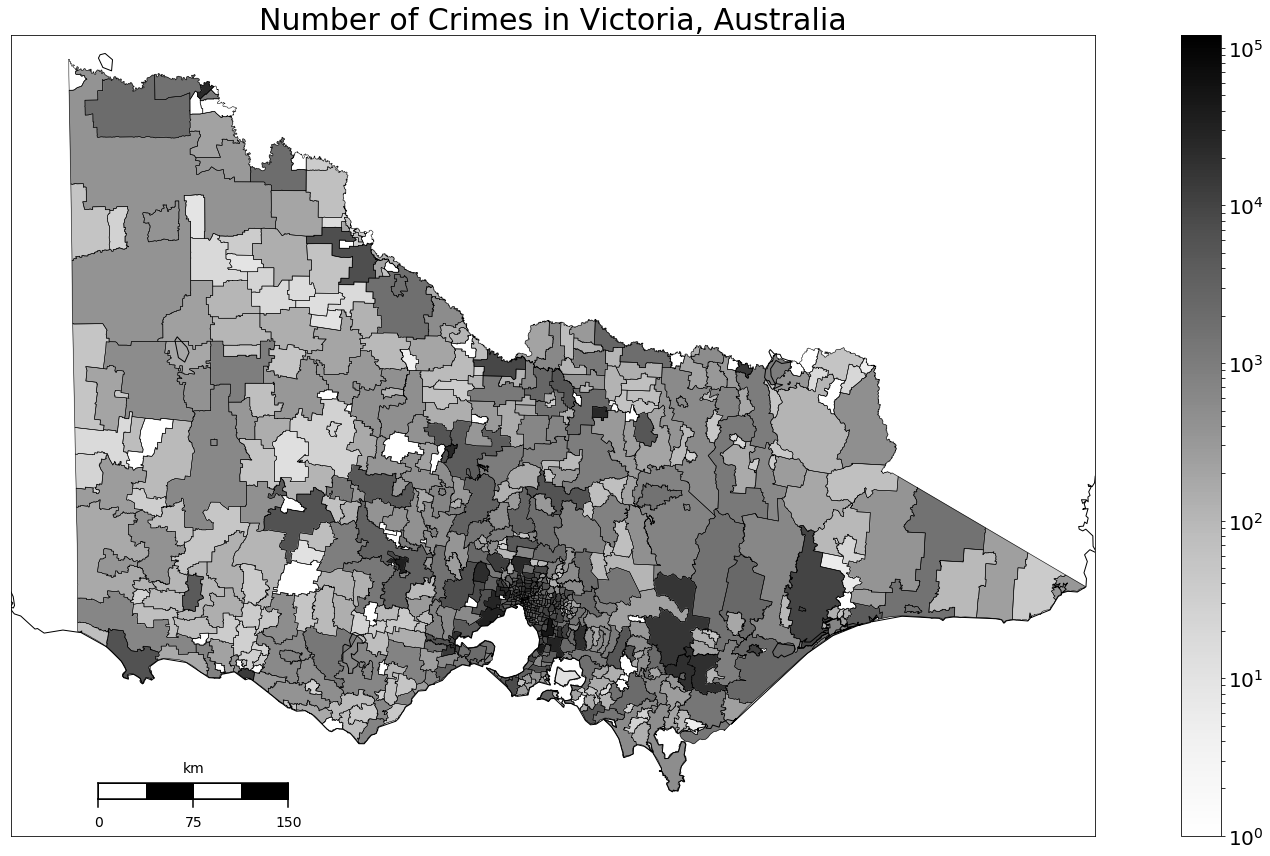

In [56]:
#function for removing duplicates and preserving order
def de_dup(seq): 
   # order preserving
   check = []
   for i in seq:
       if i not in check:
           check.append(i)
   return check


fig,ax=plt.subplots(figsize=(24,12)) #initialize size of figure



#generate the base map and enter longitude and latitude values for lowerleft corner, upper right corner and center of the image
#This generates the basic or base map upon which we overlay the data
map = Basemap(llcrnrlon=140.32,llcrnrlat=-39.5,urcrnrlon=149.7,urcrnrlat=-33.60679,
             resolution='i', projection='tmerc', lat_0 = -39, lon_0 = 142.44,width = 980, height=686)

#map.drawmapboundary(fill_color='aqua') #option to add colours
#map.fillcontinents(color='white')
map.drawcoastlines() #Draw the coastline

#Obtained Shape file (.shp) from Vic government website, which has name, postcode and shape (polygon) of each of the areas
#https://www.data.vic.gov.au/data/dataset/postcode-boundaries-polygon-vicmap-admin

map.readshapefile('vmlite_postcode_polygon', 'VIC',drawbounds=True) 


#list to store postcodes from the shape file
postcodes=[]

# set the value range (Crime number range)
vmin = 0
vmax = 120000 

#map.Vic_info has the metadata, or info such as postcode, name, etc.... generate a file with postcodes from the shapes file
#need to keep the order of this as it matches with the indexing in the coordinate file (map.VIC)

for shape in map.VIC_info:
    #access the postcode within the info file and conver into int
    postcode=int(shape['POSTCODE']) 
    postcodes.append(postcode)

#remove duplicate postcodes from list using de_dup function defined earlier
postcodes=de_dup(postcodes)   

#convert to np array for use with masks
postcodes=np.array(postcodes) 

#deleting values not shared between arrays

crimes1=crime_zip.index.values #zip codes from the crime data file stored as a list

#Inorder to account for differences in postcodes (deletions or additions), a mask is created using np.in1d
#create a mask with condition, is values in crimes1 present in postcodes
mask=np.in1d(crimes1,postcodes)
crimes_match=crimes1[mask] 

#Do it the otherway around
crimes_match=de_dup(crimes_match)
mask2=np.in1d(postcodes,crimes_match)
postcodes=postcodes[mask2]

ax = plt.gca() # get current axes instance

logmin=0.1 #account for log-scaling,as log 0 is undefined and gives an error

#Define the colours to be used based on the crime number
#colours need to be normalized to the minimum and max value of the crime number
#Log Normalisation as it gives a better distribution across uneven ranges
norm=colors.LogNorm(vmin=max(crime_zip.values.min(),logmin),vmax=vmax)

#SCalarmappable makes use of data normalisation and converts scalar data (0-1) to RGBA values for a colour map (Greys, in this instant)
mapper=cm.ScalarMappable(norm=norm,cmap=cm.Greys)

#dictionary to store postcode as key and the crime number will determine the RGB value, stored as corresponding value
niram={}

for i, v in enumerate(crime_zip):
    niram[crime_zip.index[i]]=mapper.to_rgba(v)[:3]  #returns rgba, where a is alpha. Do not need alpha so slicing it

i=0 #counter for map.VIC
j=0 #counter for psotcodes (this array is based on the info we have available about crime data) If no crime data, its not plotted


#loop to convert RGB values to Hex colour code and then fill the polygons (states) associated with postcodes with that colour
while i<len(map.VIC):
    map_code=int(map.VIC_info[i]['POSTCODE'])
    if map_code==postcodes[j]:
        #return Hex string for rgb or rgba sequence
        color = rgb2hex(niram[postcodes[j]]) 
        
        #Fill the polygon or shape (state) with the colour associated with its crime number
        poly = Polygon(map.VIC[i],facecolor=color,edgecolor=color)
        ax.add_patch(poly)
        j+=1
        i+=1
    else:
        i+=1

#setting a dummy array
mapper.set_array([])

#Creating a colour bar
cbar=plt.colorbar(mapper)
#change labelsize
cbar.ax.tick_params(labelsize=20)
#Graph title
plt.title("Number of Crimes in Victoria, Australia",fontsize=30)
plt.tight_layout()

#Draw Scale bar
map.drawmapscale(142,-39.2,143.5,-39.23,length=150,barstyle='fancy', labelstyle='simple',units='km',fontsize=14)